In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-zakorko/conversion.csv")

In [5]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [14]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [20]:
x=df.groupby('fb_campaign_id').agg({'Impressions':'sum'})

In [23]:
x1=np.log(x)

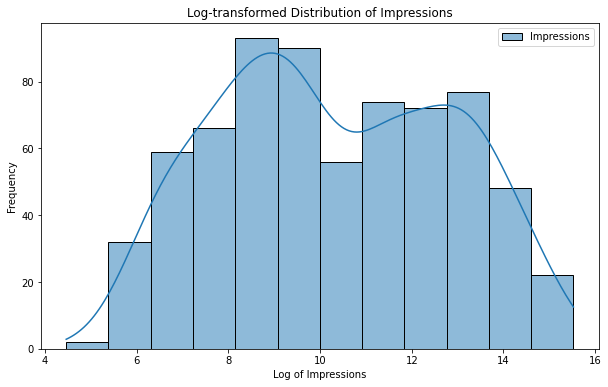

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(x1, kde=True)
plt.title('Log-transformed Distribution of Impressions')
plt.xlabel('Log of Impressions')
plt.ylabel('Frequency')
plt.show()

In [33]:
df['CTR']=df.Clicks/df.Impressions

In [36]:
df.sort_values('CTR',ascending=False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000


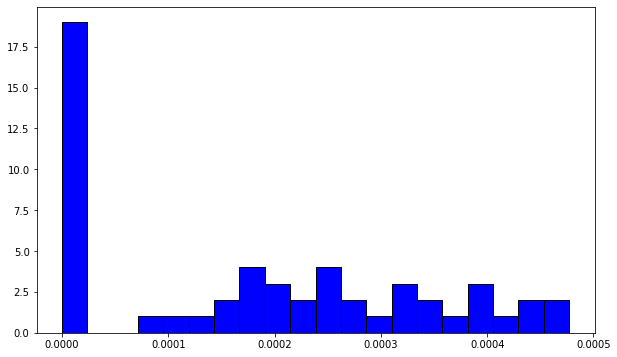

In [38]:
import matplotlib.pyplot as plt

# Filter the dataframe for the campaign 916
campaign_916_df = df[df['xyz_campaign_id'] == 916]

# Plot histogram for the CTR of campaign 916
plt.figure(figsize=(10, 6))
plt.hist(campaign_916_df['CTR'], bins=20, color='blue', edgecolor='black')
plt.show()

In [39]:
# First, we will calculate the CPC (cost-per-click) and add it as a new column.
# We will handle NaN values by using nan_policy='omit' as instructed.
df['CPC'] = df['Spent'] / df['Clicks']

# Drop the rows with NaN values in the CPC column, which result from division by zero (i.e., no clicks)
df_cleaned = df.dropna(subset=['CPC'])

# Calculate the descriptive statistics for the new CPC variable.
cpc_descriptive_stats = df_cleaned['CPC'].describe()

# Calculate the interquartile range (IQR) using scipy's iqr function.
from scipy.stats import iqr
cpc_iqr = iqr(df_cleaned['CPC'], nan_policy='omit')

# Round the descriptive statistics to two decimal places and add the interquartile range.
cpc_descriptive_stats_rounded = cpc_descriptive_stats.round(2)
cpc_descriptive_stats_rounded['IQR'] = round(cpc_iqr, 2)

# Display the descriptive statistics with IQR for the CPC variable.
cpc_descriptive_stats_rounded


count    936.00
mean       1.50
std        0.23
min        0.18
25%        1.39
50%        1.50
75%        1.64
max        2.21
IQR        0.25
Name: CPC, dtype: float64

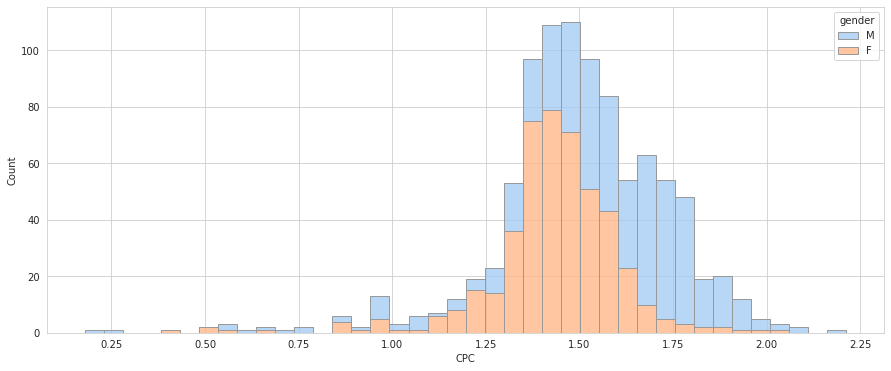

In [53]:
import seaborn as sns

# We need to visualize the distribution of CPC by gender without dropping NaN values from the dataset.
# For this visualization, NaN values in CPC will be ignored during plotting.

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))

# Plot the distribution of CPC by gender
sns.histplot(data=df, x="CPC", hue="gender", multiple="stack", palette="pastel", edgecolor=".6")

# Show the plot
plt.show()


In [54]:
# Calculate the conversion rate for the ad with ad_id 1121814
ad_id = 1121814
ad_data = df[df['ad_id'] == ad_id]

# Ensure there is data for the specified ad
if not ad_data.empty:
    clicks = ad_data['Clicks'].values[0]
    purchases = ad_data['Approved_Conversion'].values[0]
    conversion_rate = (purchases / clicks) * 100 if clicks > 0 else 0
    conversion_rate_rounded = round(conversion_rate, 2)
else:
    conversion_rate_rounded = None

conversion_rate_rounded


3.09